In [1]:
# use spam.csv dataset from sms-spam-collection-dataset.zip

In [2]:
# 1. Create a word cloud to analyse the ham data

In [3]:
! pip install stop-words

In [156]:
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


In [144]:

import pandas as pd
import os as os
 

In [145]:
os.getcwd()
os.chdir('D:\\')

In [146]:
spam_df = pd.read_csv("spam.csv", encoding='ISO-8859-1', engine='c')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
spam_df=spam_df[['v1','v2']]
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
spam_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
spam_list = spam_df[spam_df["target"] == "ham"]["text"].unique().tolist()
spam_list[:2]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...']

In [149]:
ham = " ".join(spam_list)
ham[:100]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a'

In [150]:
spam_wordcloud = WordCloud().generate(ham)

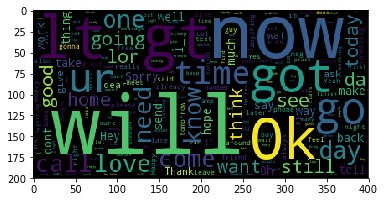

In [151]:
plt.figure()
plt.imshow(spam_wordcloud)
plt.show()

In [152]:
spam_df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
ham_list = spam_df[spam_df["target"] == "ham"]["text"].unique().tolist()
ham_list[:100]

['Go jurong point, crazy.. Available bugis n great world la e buffet... Cine got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say early hor... U c already say...',
 "Nah I don't think goes usf, lives around though",
 'Even brother like speak me. They treat like aids patent.',
 "As per request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' set callertune Callers. Press *9 copy friends Callertune",
 "I'm gonna home soon don't want talk stuff anymore tonight, k? I've cried enough today.",
 "I've searching right words thank breather. I promise wont take help granted fulfil promise. You wonderful blessing times.",
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 "Oh k...i'm watching here:)",
 'Eh u remember 2 spell name... Yes did. He v naughty make v wet.',
 'Fine thatåÕs way u feel. ThatåÕs way gota b',
 'Is seriously spell name?',
 'I\x89Û÷m going try 2 months ha ha joking',
 'So Ì_ pay first lar... Then da stock comin...',
 'Aft finish lunch go str lor. Ard 3 smth lor. U finish 

In [107]:
ham_wordcloud = WordCloud().generate(ham)

In [15]:
# 2. create a custom bag of words

In [153]:
spam_list = spam_df[spam_df["target"] == "ham"]["text"].unique().tolist()
spam_list

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 "Oh k...i'm watching here:)",
 'Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.',
 'Fine if t

In [18]:
# 3. remove stop words from the bag of words

In [157]:



stopWords = set(stopwords.words('english'))

In [158]:
spam_df['text'] = spam_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
spam_df.head()

,target,text
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I don't think goes usf, lives around though"


In [ ]:
# 3. using numpy create count vectors for the text data using bag of words

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
cv = CountVectorizer()

In [161]:
cv.fit(spam_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [162]:
X = cv.transform(spam_df.text)
X.shape


(5572, 8665)

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(spam_df.target)
y.shape

(5572,)

In [164]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
# 4. fit the naive bayes model with above vectors and compare the accuracy with existing model

In [135]:
from sklearn.naive_bayes import MultinomialNB

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [138]:
clf = MultinomialNB()

In [139]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [140]:
predictions=clf.predict(X_test)

In [141]:
predictions.shape

(1393,)

In [142]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.98420674802584351

The accuracy of model is 98% accuracte.